Include "module load openmpi/v4.1.6" in OnDemand custom call

In [1]:
from UTILITY_QPAD import QPAD_sim
import numpy as np

# directory to store QPAD simulation output
sim_dir = './qpad'


# normalizing density
n0 = 6.73e16 * 1e6 # m^[-3]
sim = QPAD_sim(n0)
kp = sim.kp
wp = sim.wp



sim.init_grid(nr = 384, nz = 768, rmin = 0, rmax = 9/kp, zmin = -8/kp, zmax = 2/kp)

# Example: add bunch from openPMD file (qpad_beam_file.h5 created in directory as input to QPAD)
sim.add_openpmd_file_bunch('beamAt_PENT.h5', 'qpad_beam_file.h5', directory = sim_dir)


# Example: add 2nC gaussian bunch
# sim.add_gaussian_electron_bunch(2e-9, [0.5/kp, 0.5/kp, 0.5/kp])


# Example: add uniform pre-ionized plasma with density n0
# sim.add_uniform_plasma(number_density =n0) 

# Example: add neutral gas with density n0
# sim.add_uniform_neutral_gas(number_density = n0) 

z, nLi, nHe = sim.generate_Li_oven_profile()

# # add Lithium gas profile
sim.add_longitudinal_neutral_gas_profile(z, nLi, particle_type = 'Li', max_level = 1) # only consider first level of Lithium

# # add Helium gas profile
sim.add_longitudinal_neutral_gas_profile(z, nHe, particle_type = 'He', max_level = 1) # only consider first level of Helium




## field diagnostics (dump every 10 timesteps)
sim.add_field_diagnostics(data_list = ['Ez', 'rho', 'psi'], period = 10) # 

## add particle diagnotics (dump every timestep)
sim.add_particle_diagnostics(period = 1)

# generate QPAD input deck and data dumps (in sim_dir) and run code (specify path_to_qpad directory containing qpad.e)
sim.run_simulation(dt = 20/wp, tmax = 200.1/wp, sim_dir = sim_dir, path_to_qpad = '/sdf/group/facet/codes/QPAD/bin')

Defaulting to n_iterations = 10 for predictor corrector
{'QPAD_sample': 1}
normalizing -1.602176634e-19


mkdir: cannot create directory ‘./ELOG’: File exists


 Initializing simulation...
 Using user-specified seeds for pseudo-random numbers.
 Initializing fields...
 Initializing beams...
 [proc 0] Resizing beam particle buffer: 98304 -> 148725
 [proc 0] Resizing beam particle buffer: 148725 -> 218804
 [proc 0] Resizing beam particle buffer: 218804 -> 288898
 [proc 0] Resizing beam particle buffer: 288898 -> 358968
 [proc 0] Resizing beam particle buffer: 358968 -> 499160
 [proc 0] Resizing beam particle buffer: 499160 -> 639322
 [proc 0] Resizing beam particle buffer: 639322 -> 779489
 [proc 0] Resizing beam particle buffer: 779489 -> 989758
 Initializing lasers...
 Initializing plasma...
 Initializing diagnostics...
 Initializing pipeline...
 Starting simulation...
 3D step = 1
 3D step = 2
 3D step = 3
 3D step = 4
 3D step = 5
 3D step = 6
 3D step = 7
 3D step = 8
 3D step = 9
 3D step = 10
 Terminating simulation...


# Visualize

In [2]:
from UTILITY_quickstart import *

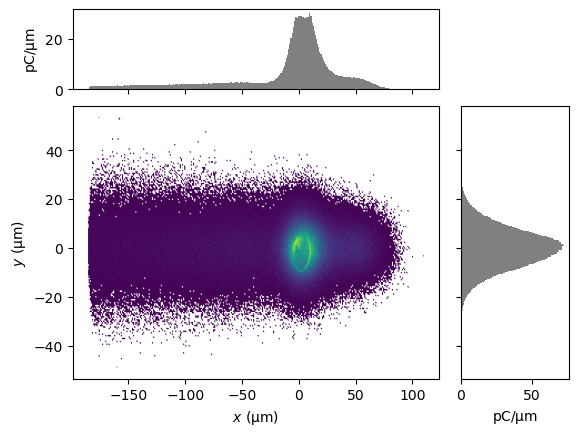

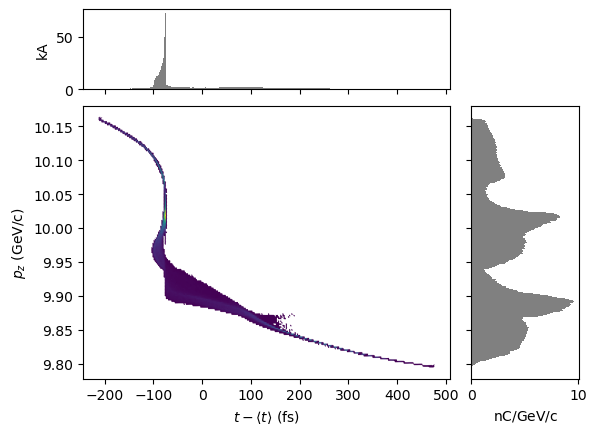

<Figure size 640x480 with 0 Axes>

In [3]:
P = ParticleGroup("./qpad/Beam1/Raw/raw_00000009.h5")
display(plotMod(P, 'x', 'y',  bins=300))
display(plotMod(P, 'delta_t', 'pz',  bins=300))
plt.clf()

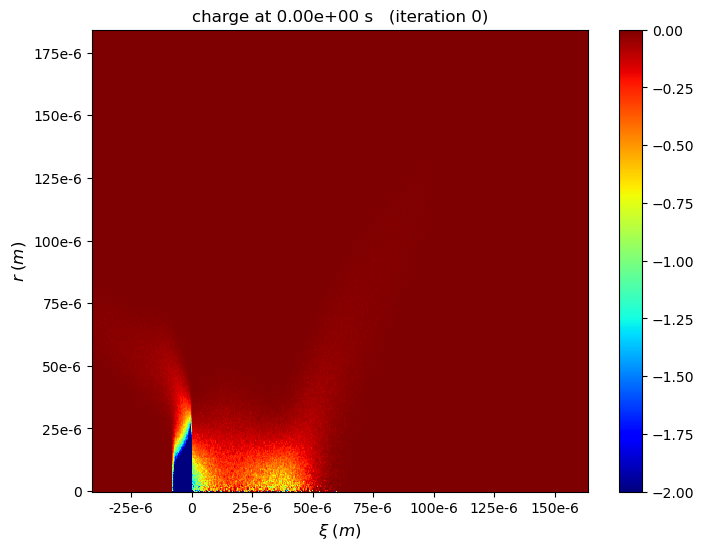

In [5]:
import matplotlib

matplotlib.rcParams['figure.figsize'] = (8,6)
from openpmd_viewer import OpenPMDTimeSeries
import scipy.constants as cst
import numpy as np
import matplotlib.pyplot as plt
import h5py
ts = OpenPMDTimeSeries('./qpad/Beam1/Charge/Re0/')
# ts = OpenPMDTimeSeries('./Neutral1/Charge/Re0/')
# ts = OpenPMDTimeSeries('./Neutral1/Ion_charge/Re0/')
# ts = OpenPMDTimeSeries('./Fields/Er/Re0/')
# ts = OpenPMDTimeSeries('./Fields/Er/Re0/')
label = list(ts.fields_metadata.keys())[0]
axis_labels = ts.fields_metadata[label]['axis_labels']
field, info = ts.get_field( iteration = 0,  field=label, vmin = -2, cmap = 'jet',coord='z', plot=True )

plt.show()